In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [435]:
df=pd.read_csv('training_data.csv')
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [436]:
df.drop(['id','user_id','package_id','to_area_id', 'from_city_id',    'to_city_id',    'to_date',       
'from_lat',    'from_long',    'to_lat',    'to_long'],inplace=True,axis=1)
df.head() #these columns are of no use for analysis

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Cost_of_error
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,0,1.0
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,0,1.0
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,0,1.0
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,0,1.0
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,0,1.0


In [437]:
pd.crosstab(df.vehicle_model_id,df.Car_Cancellation) #make crosstable

Car_Cancellation,0,1
vehicle_model_id,,
1,2,0
10,104,0
12,29191,2668
13,6,1
14,1,0
17,40,0
23,297,0
24,1491,3
28,1626,76


In [438]:
df['vehicle_model_id'].corr(df['Car_Cancellation']) #no correlation so we can remove this column actually

-0.045244013393856315

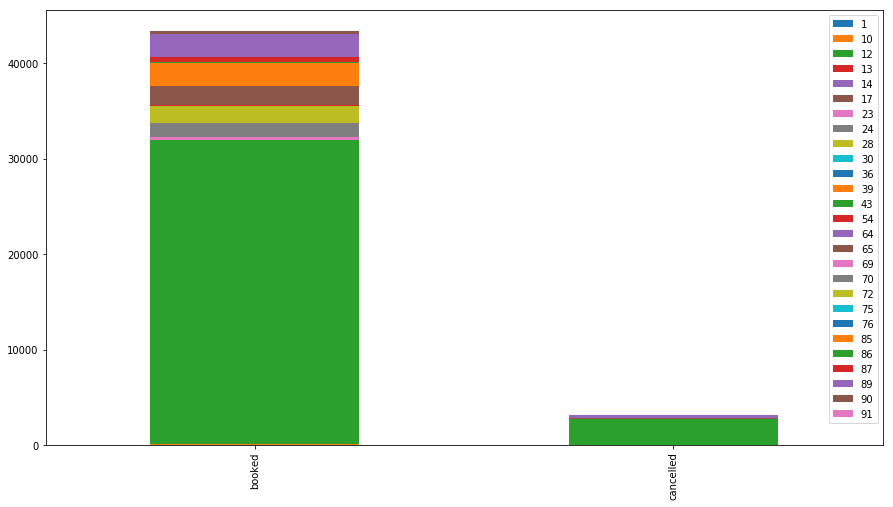

In [439]:
#Analysing vehicle_model_id
all_bookings=df['vehicle_model_id'].value_counts()
cancelled=df[df['Car_Cancellation']==1]['vehicle_model_id'].value_counts()
qf=pd.DataFrame([all_bookings,cancelled])
qf.fillna(0,inplace=True)
qf.index=['booked','cancelled']
qf.plot(kind='bar',stacked=True,figsize=(15,8))
plt.show()

In [440]:
df.drop('vehicle_model_id',inplace=True,axis=1)#remove column

In [441]:
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 8 columns):
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
from_date              43431 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Cost_of_error
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,0,1.0
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,0,1.0
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,0,1.0
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,0,1.0
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,0,1.0


In [442]:
#making new column time difference between booking date and travel date can help in analysis as booking made long time ago
#is  more likely to be cancelled .
a=np.array(df['from_date'])
a=a.astype('str')
b=[]
for j in a:
    b.append(j.split()[0])
    

In [443]:
time=[]
for i in a:
    time.append(i.split()[1])

In [444]:
b_day=[]
b_month=[]
b_year=[]
for q in b:
    b_day.append(q.split('/')[1])
    b_month.append(q.split('/')[0])
    b_year.append(q.split('/')[2])

In [445]:
time_hours=[]
time_minutes=[]

for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])
    

In [446]:
booking=np.array(df['booking_created'])
booking=booking.astype('str')
x=[]
for j in booking:
    x.append(j.split()[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split()[1])
booking_day=[]
booking_month=[]
booking_year=[]
for q in x:
    booking_day.append(q.split('/')[1])
    booking_month.append(q.split('/')[0])
    booking_year.append(q.split('/')[2])
bookingtime_hours=[]
bookingtime_minutes=[]

for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])

In [447]:
type(bookingtime_hours[1])

str

In [448]:
#computing difference in days between booking date and trip date

import datetime
difference_days=[]
bookingdate=[]
tripdate=[]
for i in range(len(bookingtime_hours)):
    bookingdate.append(datetime.datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime.datetime(int(b_year[i]),int(b_month[i]),int(b_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    diff = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    
    difference_days.append(days)

In [449]:
(difference_days)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 22,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 3,
 0,
 1,
 

In [450]:
df.info()
df['days_difference']=np.array(difference_days)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 8 columns):
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
from_date              43431 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


In [451]:
df['days_difference'].value_counts()

 0     20318
 1     16364
 2      2096
 3       958
 4       650
 5       472
 6       353
 7       270
 8       179
 11      126
 12      122
 10      121
 9       120
 13      120
 14       87
 18       86
 20       85
 19       81
 17       80
 25       74
 21       69
 15       66
 16       64
 28       64
 26       63
 27       62
 24       57
 22       53
 29       45
 23       44
 31       25
 30       19
 32       10
 33        7
 34        6
 40        2
 46        2
 36        2
 62        1
 79        1
-1         1
 52        1
 51        1
 50        1
 80        1
 77        1
 39        1
Name: days_difference, dtype: int64

In [452]:
qc=pd.crosstab(df.days_difference,df.Car_Cancellation,normalize='index')


In [453]:
qc.columns=['we','ty']

In [454]:
qc

,we,ty
days_difference,,
-1,1.000000,0.000000
0,0.899990,0.100010
1,0.952762,0.047238
2,0.977576,0.022424
3,0.975992,0.024008
4,0.980000,0.020000
5,0.976695,0.023305
6,0.957507,0.042493
7,0.948148,0.051852


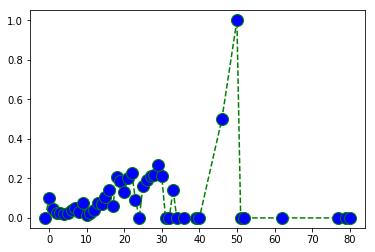

In [455]:
plt.plot(qc.index,qc['ty'],color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.show()

In [456]:
#removing outliers
o=qc[qc['ty']==1].index

print(o)

Int64Index([50], dtype='int64', name='days_difference')


In [457]:
df = df[df.days_difference != 50]

In [458]:
df = df[df.days_difference != 46]

In [459]:
len(df)

43428

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43430
Data columns (total 9 columns):
travel_type_id         43428 non-null int64
from_area_id           43340 non-null float64
from_date              43428 non-null object
online_booking         43428 non-null int64
mobile_site_booking    43428 non-null int64
booking_created        43428 non-null object
Car_Cancellation       43428 non-null int64
Cost_of_error          43428 non-null float64
days_difference        43428 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 3.3+ MB


In [461]:
df.drop(['from_date','booking_created'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43430
Data columns (total 7 columns):
travel_type_id         43428 non-null int64
from_area_id           43340 non-null float64
online_booking         43428 non-null int64
mobile_site_booking    43428 non-null int64
Car_Cancellation       43428 non-null int64
Cost_of_error          43428 non-null float64
days_difference        43428 non-null int64
dtypes: float64(2), int64(5)
memory usage: 2.7 MB


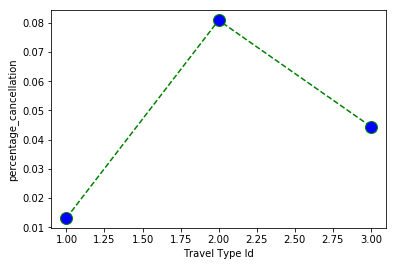

In [462]:
#Analysing travel type id
zc=pd.crosstab(df.travel_type_id,df.Car_Cancellation,normalize='index')
zc.columns=['not_cancelled','cancelled']
plt.plot(zc.index,zc['cancelled'],color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.xlabel('Travel Type Id')
plt.ylabel('percentage_cancellation')
plt.show()

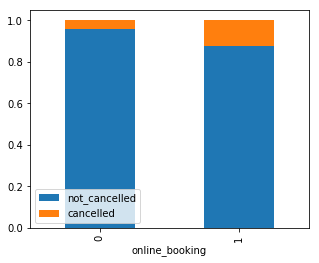

                not_cancelled  cancelled
online_booking                          
0                    0.956424   0.043576
1                    0.875377   0.124623


In [463]:
#Analysing online_booking
ax=pd.crosstab(df.online_booking,df.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

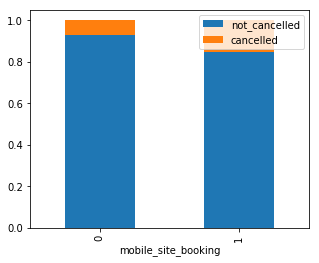

                     not_cancelled  cancelled
mobile_site_booking                          
0                         0.931625   0.068375
1                         0.846113   0.153887


In [464]:
#Analysing mobile_site_booking
ax=pd.crosstab(df.mobile_site_booking,df.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

In [465]:
df['from_area_id'].value_counts()
df['from_area_id'].corr(df['Car_Cancellation'])

0.011153809835733277

In [466]:
df.drop('from_area_id',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43430
Data columns (total 6 columns):
travel_type_id         43428 non-null int64
online_booking         43428 non-null int64
mobile_site_booking    43428 non-null int64
Car_Cancellation       43428 non-null int64
Cost_of_error          43428 non-null float64
days_difference        43428 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


In [467]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43430
Data columns (total 6 columns):
travel_type_id         43428 non-null int64
online_booking         43428 non-null int64
mobile_site_booking    43428 non-null int64
Car_Cancellation       43428 non-null int64
Cost_of_error          43428 non-null float64
days_difference        43428 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


In [472]:
df1=df
sx=shuffle(df1).reset_index(drop=True)
sx

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation,Cost_of_error,days_difference
0,2,1,0,0,1.0,0
1,2,0,0,0,1.0,0
2,2,0,0,0,1.0,0
3,2,0,0,0,1.0,1
4,2,0,0,0,1.0,0
5,3,0,0,0,1.0,0
6,2,1,0,0,1.0,0
7,3,1,0,0,1.0,0
8,2,0,0,0,1.0,0
9,2,0,0,0,1.0,0


In [475]:
target=sx['Car_Cancellation']
cost=sx['Cost_of_error']
sx.drop(['Car_Cancellation','Cost_of_error'],inplace=True,axis=1)

In [476]:
sx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43428 entries, 0 to 43427
Data columns (total 4 columns):
travel_type_id         43428 non-null int64
online_booking         43428 non-null int64
mobile_site_booking    43428 non-null int64
days_difference        43428 non-null int64
dtypes: int64(4)
memory usage: 1.3 MB


In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx, target, test_size=0.33, random_state=42)

In [479]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)


GaussianNB(priors=None)

In [481]:
y_predict=clf.predict(X_test)

In [484]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)
print(clf.score(X_test,y_test))

[[12522   736]
 [  919   155]]
0.884524141781


In [494]:
import sklearn
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
sklearn.model_selection.learning_curve(estimator, sx, target)

(array([ 2895,  9409, 15923, 22437, 28951]),
 array([[ 0.8835924 ,  0.88255613,  0.88255613],
        [ 0.88457859,  0.88500372,  0.88500372],
        [ 0.88224581,  0.87967092,  0.88168059],
        [ 0.88273833,  0.88050987,  0.88327316],
        [ 0.88273289,  0.88180028,  0.88332009]]),
 array([[ 0.8788423 ,  0.89119923,  0.88842832],
        [ 0.88146715,  0.89030119,  0.88677029],
        [ 0.8799475 ,  0.8851202 ,  0.88214162],
        [ 0.87863508,  0.88436032,  0.88214162],
        [ 0.8799475 ,  0.8851202 ,  0.88214162]]))

In [502]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

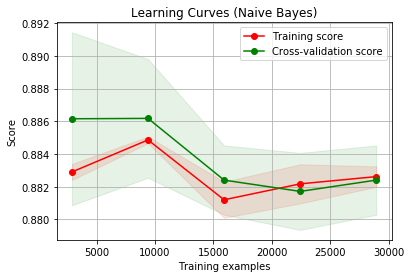

In [504]:
from sklearn.model_selection import learning_curve

estimator = GaussianNB()
title = "Learning Curves (Naive Bayes)"
plot_learning_curve(estimator,title,sx,target)

plt.show()

In [513]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [514]:
y_predict=neigh.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)
print(neigh.score(X_test,y_test))


[[13258     0]
 [ 1074     0]]
0.925062796539


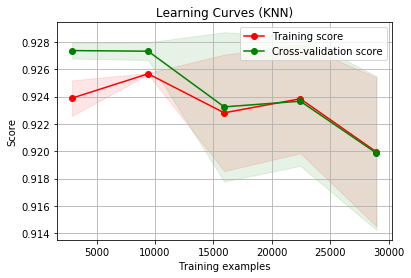

In [515]:
estimator = KNeighborsClassifier()
title = "Learning Curves (KNN)"
plot_learning_curve(estimator,title,sx,target)

plt.show()